In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Production

In [2]:
query_entries_prod = pd.read_csv('../data/saleorSchemaCoverageDictionary.csv')
query_entries_prod = query_entries_prod[query_entries_prod.schemaTuple.str.contains("query")]

In [3]:
query_entries_prod.sort_values(by=['timesVisited'], inplace=True)
query_entries_prod

,schemaTuple,visited,timesVisited
68,query_service,False,0
67,query_entities,False,0
39,querymenuitem,False,0
40,querymenuitems,False,0
41,querygiftcard,False,0
...,...,...,...
48,queryvouchers,True,35
16,querycategories,True,36
17,querycategory,True,122
14,queryattributes,True,184


Text(0.5, 1.0, 'Visisted query entry-points in Saleor (Production)')

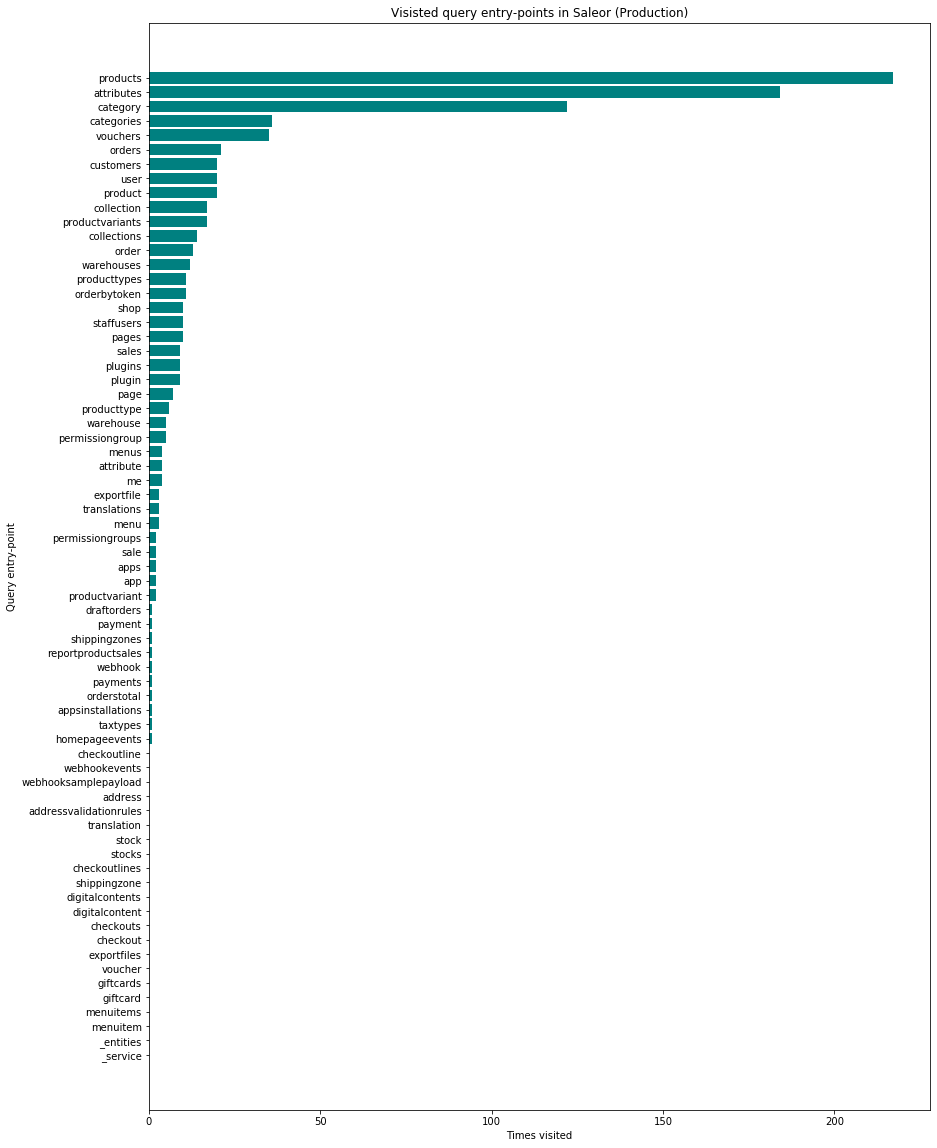

In [4]:
plt.figure(figsize=(14, 20))
plt.barh(query_entries_prod["schemaTuple"].str.replace("query", ""), 
         query_entries_prod["timesVisited"], 
         align='center',
         color='teal')
plt.xlabel('Times visited')
plt.ylabel('Query entry-point')
plt.title('Visisted query entry-points in Saleor (Production)')

### Original test suite

In [5]:
query_entries_test = pd.read_csv('../data/saleorSchemaCoverageDictionaryExistingTests.csv')
query_entries_test = query_entries_test[query_entries_test.schemaTuple.str.contains("query")]

In [6]:
query_entries_test.sort_values(by=['timesVisited'], inplace=True)
query_entries_test

,schemaTuple,visited,timesVisited
68,query_service,False,0
51,querytaxtypes,False,0
42,querygiftcards,True,1
13,querydigitalcontents,True,1
45,querysale,True,1
...,...,...,...
34,querydraftorders,True,46
61,querycustomers,True,56
14,queryattributes,True,75
33,queryorders,True,98


Text(0.5, 1.0, 'Visisted query entry-points in Saleor (Test)')

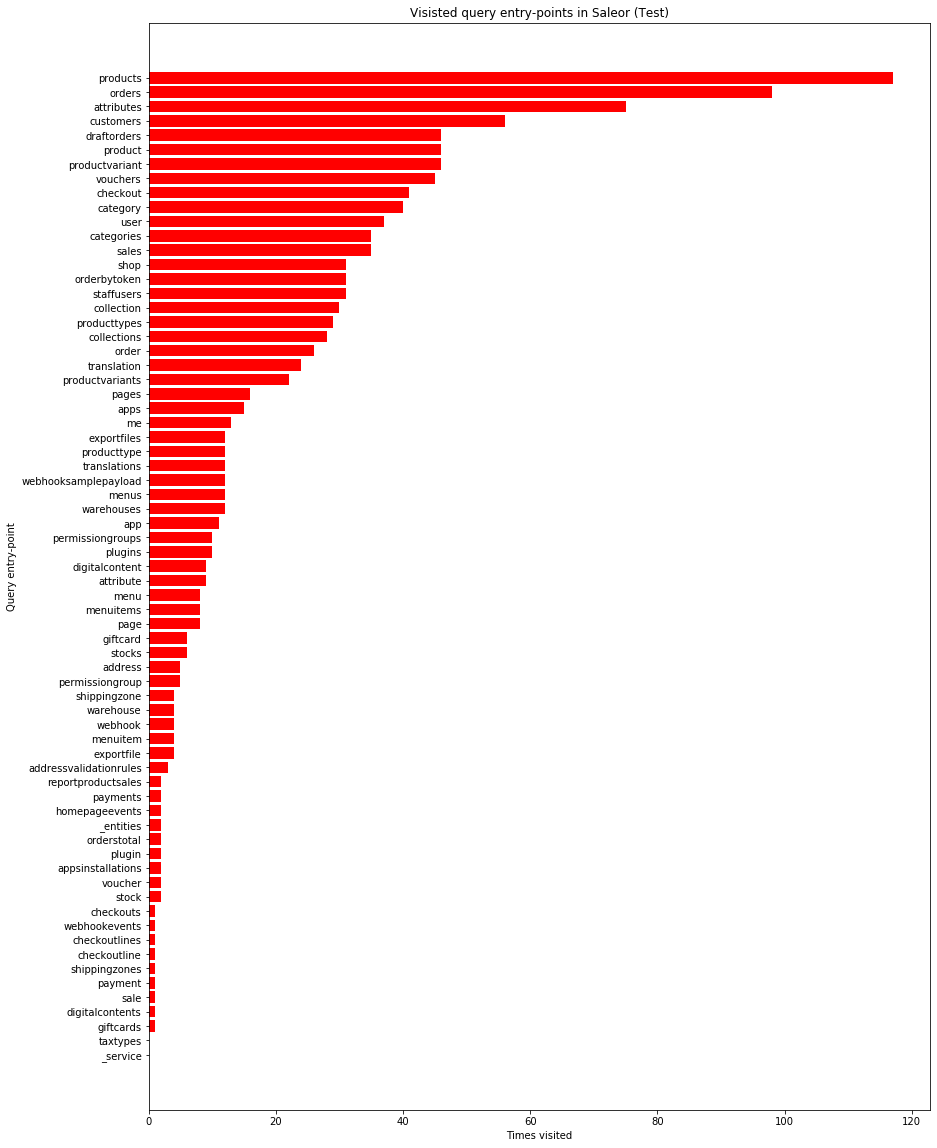

In [7]:
plt.figure(figsize=(14, 20))
plt.barh(query_entries_test["schemaTuple"].str.replace("query", ""), 
         query_entries_test["timesVisited"], 
         align='center', 
         color='red')
plt.xlabel('Times visited')
plt.ylabel('Query entry-point')
plt.title('Visisted query entry-points in Saleor (Test)')

### Merged

Text(0.5, 1.0, 'Visisted query entry-points in Saleor (test and prod)')

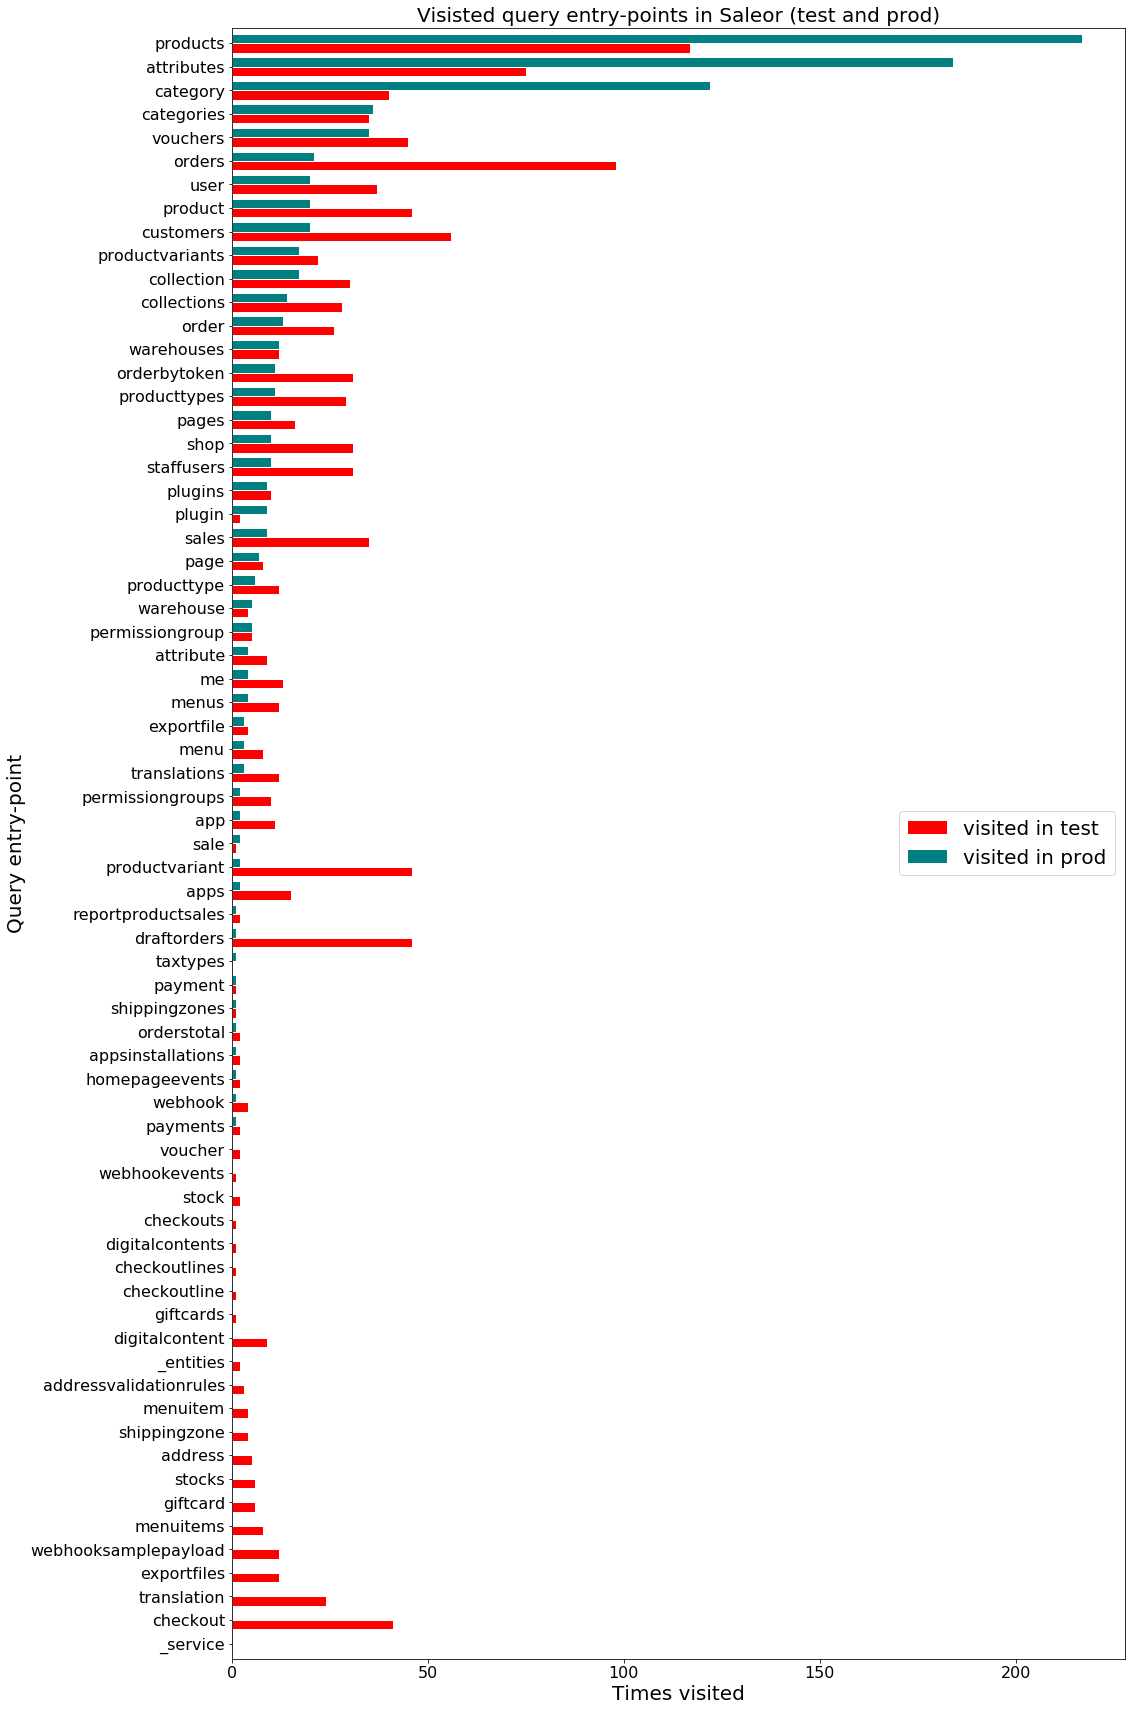

In [8]:
merged_df = pd.merge(query_entries_test, query_entries_prod, on='schemaTuple')
merged_df["schemaTuple"] = merged_df["schemaTuple"].str.replace("query", "")
merged_df = merged_df.rename(columns={"visited_x": "visitedTest", 
                                      "visited_y": "visitedProd", 
                                      "timesVisited_x": "timesVisitedTest", 
                                      "timesVisited_y": "timesVisitedProd"})
merged_df.sort_values(by=["timesVisitedProd"], inplace=True) 

merged_df.plot(x="schemaTuple", 
               y=["timesVisitedTest", "timesVisitedProd"], 
               edgecolor='white',
               linewidth=1,
               align='center',
               width=0.8,
               kind="barh",
               figsize=(16, 30),
               color=['red', 'teal'])
plt.xlabel('Times visited', fontdict={'fontsize':20})
plt.xticks(fontsize=16)
plt.ylabel('Query entry-point', fontdict={'fontsize':20})
plt.yticks(fontsize=16)
plt.legend(["visited in test", "visited in prod"], loc='center right', fontsize=20)
plt.title('Visisted query entry-points in Saleor (test and prod)', fontsize=20)